In [2]:
import os, json
import sys
import urllib.request

In [1]:
# 네이버 API 발급 가능. 
client_id = "ID"
client_secret = "PW" 

In [113]:
search = '맘큐'

In [114]:
encText = urllib.parse.quote(search)

In [141]:
# url = "https://openapi.naver.com/v1/search/blog.json?query=s" + encText +"&display=100" +# json 결과
url = "https://openapi.naver.com/v1/search/blog.json?query={name}&display=100&start={start}"
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과

In [142]:
res_name = [] 

In [173]:
for i in range(1,1000,100):
    request = urllib.request.Request(url.format(name= encText, start= i))
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request)
    rescode = response.getcode()
    a= response.read().decode('utf-8')
    output_list = json.loads(a)
    for output in output_list.get('items'):
        if output == None:
            break
        json_string = output.get('title')
        json_string = re.sub('<.+?>', '', json_string)
        res_name.append(json_string)

In [174]:
res_name

['<b>맘큐</b> 허그박스 당첨후기',
 '[무료임신축하선물] <b>맘큐</b> HUGBOX 신청 &amp; 도착!',
 '하기스 선물대잔치 <b>맘큐</b> 포인트 적립 방법!',
 '신청, 허그박스 구성품, 임신축하선물, 더블하트제품, <b>맘큐</b>가입',
 '하기스 선물대잔치.. <b>맘큐</b> 포인트 전환...',
 '[임신축하선물] 하기스허그박스/<b>맘큐</b>허그박스',
 '하기스 점수 <b>맘큐</b> 포인트로 바꿔서 사용해요',
 '레고 듀플로 유아장난감 블록 <b>맘큐</b> 감사해요',
 '<b>맘큐</b> 허그박스 수령 후기 - 임신 27주 2일째!',
 '[임신 축하 선물] 하기스 <b>맘큐</b> 허그박스 후기 :) - 무료 임신... ',
 '<b>맘큐</b> 하기스 허그박스 임신축하선물',
 '하기스 <b>맘큐</b> 허그박스 임산출선선물 좋구나~',
 "0301~0308 주머니가계부(Ju'sMoney)_동원몰,<b>맘큐</b>,AP몰",
 '[추천]  <b>맘큐</b>/허그박스 이벤트 당첨후기!^^',
 "임신축하선물 ) <b>맘큐</b> '하기스 허그박스(HUG BOX)' 당첨 후기!",
 '<b>맘큐</b> 허그박스 시즌2 받고, (추천인 ddunkin 3000포인트... ',
 '[임신축하박스]<b>맘큐</b> 하기스 허그막스^^',
 '[<b>맘큐</b>]허그박스 당첨 후기',
 '하기스 <b>맘큐</b> 무료임신출산축하선물, 허그박스 수령 후기',
 '무료임신축하선물 하기스 <b>맘큐</b> 허그박스 저도 신청했어요!',
 '[<b>맘큐</b> 허그박스] 2017년과 2019년 <b>맘큐</b>박스 비교',
 '하기스 기저귀 핫딜 하기스 <b>맘큐</b> 추천인 h100404',
 '하기스 <b>맘큐</b> 허그박스 받았어요~♡ (+ 신청방법)',
 '하기스 <b>맘큐</b> 허그박스 무료임신축하선물 신청하세요!',
 '[허그박스]#<b>맘큐</b> #더욱 푸짐해진 허그박스 시즌2 후기',
 '<b>맘큐</b> 

In [158]:
import pandas as pd 
from pandas import DataFrame, Series
import konlpy
from konlpy.tag import *
import pytagcloud
import sys
import urllib, random, webbrowser

In [146]:
import re

In [164]:
kkma = Hannanum()

In [195]:
twitter = Twitter()

sentences_tag = []
#형태소 분석하여 리스트에 넣기
for sentence in res_name:
    morph = twitter.pos(sentence)
    sentences_tag.append(morph)
    print(morph)
    print('-' * 30)

[('<', 'Punctuation'), ('b', 'Alpha'), ('>', 'Punctuation'), ('맘큐', 'Noun'), ('</', 'Punctuation'), ('b', 'Alpha'), ('>', 'Punctuation'), ('허그', 'Noun'), ('박스', 'Noun'), ('당첨', 'Noun'), ('후기', 'Noun')]
------------------------------
[('[', 'Punctuation'), ('무료', 'Noun'), ('임신', 'Noun'), ('축하', 'Noun'), ('선물', 'Noun'), (']', 'Punctuation'), ('<', 'Punctuation'), ('b', 'Alpha'), ('>', 'Punctuation'), ('맘큐', 'Noun'), ('</', 'Punctuation'), ('b', 'Alpha'), ('>', 'Punctuation'), ('HUGBOX', 'Alpha'), ('신청', 'Noun'), ('&', 'Punctuation'), ('amp', 'Alpha'), (';', 'Punctuation'), ('도착', 'Noun'), ('!', 'Punctuation')]
------------------------------
[('하기스', 'Noun'), ('선물', 'Noun'), ('대', 'Modifier'), ('잔치', 'Noun'), ('<', 'Punctuation'), ('b', 'Alpha'), ('>', 'Punctuation'), ('맘큐', 'Noun'), ('</', 'Punctuation'), ('b', 'Alpha'), ('>', 'Punctuation'), ('포인트', 'Noun'), ('적립', 'Noun'), ('방법', 'Noun'), ('!', 'Punctuation')]
------------------------------
[('신청', 'Noun'), (',', 'Punctuation'), ('허그',

In [196]:
noun_adj_list = []
#명사와 형용사만 구분하여 이스트에 넣기
for sentence1 in sentences_tag:
    for word, tag in sentence1:
        if tag in ['Noun', 'Adjective']:
            noun_adj_list.append(word)

In [198]:
#형태소별 count
counts = Counter(noun_adj_list)
tags = counts.most_common(30)
print(tags)

[('맘큐', 4016), ('하기스', 2184), ('박스', 1981), ('허그', 1853), ('선물', 1136), ('임신', 985), ('축하', 684), ('이벤트', 649), ('무료', 597), ('당첨', 541), ('출산', 473), ('후기', 468), ('기저귀', 356), ('추천', 289), ('유한킴벌리', 252), ('포인트', 225), ('신청', 221), ('혜택', 218), ('할인', 176), ('앱', 174), ('스', 152), ('육아', 148), ('물티슈', 144), ('쇼핑', 143), ('맘', 137), ('구매', 128), ('웰컴', 128), ('가지', 124), ('가입', 116), ('구입', 116)]


In [211]:
wc = WordCloud(font_path='BMJUA_ttf.ttf', background_color='white', width=800, height=600)
print(dict(tags))
cloud = wc.generate_from_frequencies(dict(tags))

{'맘큐': 4016, '하기스': 2184, '박스': 1981, '허그': 1853, '선물': 1136, '임신': 985, '축하': 684, '이벤트': 649, '무료': 597, '당첨': 541, '출산': 473, '후기': 468, '기저귀': 356, '추천': 289, '유한킴벌리': 252, '포인트': 225, '신청': 221, '혜택': 218, '할인': 176, '앱': 174, '스': 152, '육아': 148, '물티슈': 144, '쇼핑': 143, '맘': 137, '구매': 128, '웰컴': 128, '가지': 124, '가입': 116, '구입': 116}


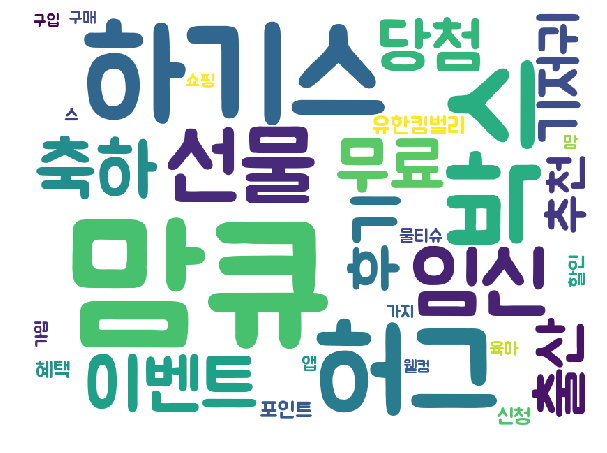

In [212]:
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [132]:
r = lambda: random.randint(0, 255)
color = lambda: (r(), r(), r())

In [150]:
data = pd.DataFrame(res_name)

In [156]:
from collections import Counter

In [187]:
word_dict = {}
malist = []
for i in data[0]:
    malist += kkma.nouns(i)
    count = Counter(malist)

cou = []
for n,c in count.most_common(100):
    print(n,c)
    cou.append({'color': color(), 'tag':n, 'size': c})


> 765
하기스 465
허그박스 342
이벤트 126
당첨 82
임신축하선물 60
기저귀 50
유한킴벌리 48
후기 45
무료임신축하선물 42
무료 40
포인트 38
선물 37
<b>맘큐 32
신청 30
임신 30
웰컴혜택 29
5가지 29
>] 28
임신출산선물 27
물티슈 25
추천 24
구입 24
후 23
추천인 22
저렴 22
육아용품 20
>허그박스 19
쇼핑 19
가입 18
적립금 18
>, 17
앱테크 17
선물대잔치 16
&amp; 15
도착 14
구매 14
할인 13
>(momQ) 13
더블하트 13
[하기스 12
출산 11
네이처메이드 11
혜택 11
허그박스(HUG 10
핫딜 10
체험 10
땡큐프라이스 10
박스 10
예비맘 10
알뜰 10
쿠폰 10
육아포럼 10
당첨후기 9
전환 9
축하 9
당첨후 9
♥ 9
준비한 9
최대 9
확인 9
적립 8
사용 8
레 8
무료임신출산선물 8
앱 8
임산부 8
아기용품 8
매직팬티 8
샘플 8
듀플 7
수령 7
시즌2 7
할 7
| 7
수딩케 7
허그 7
준비 7
임신축하박스 7
무료출산선물 7
>포인트 7
방법 6
아이 6
신제품 6
하기스허그박스 6
출산준비 6
신청하세요 6
릴리유 6
임신출산축하선물 6
당첨♡ 6
드시모네 6
베이비캡슐 6
프리미엄 6
♡ 6
축하선물 6
>) 6
쇼핑몰 6
육아정보 6
수 6
아기 6
[{'color': (40, 170, 57), 'tag': '>', 'size': 765}, {'color': (114, 5, 154), 'tag': '하기스', 'size': 465}, {'color': (110, 231, 236), 'tag': '허그박스', 'size': 342}, {'color': (60, 210, 69), 'tag': '이벤트', 'size': 126}, {'color': (24, 133, 247), 'tag': '당첨', 'size': 82}, {'color': (154, 230, 140), 'tag': '임신축하선물', 'size': 60}, {